# Dataset and libraries loading.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle

In [2]:
train_data = pd.read_excel('Flight Dataset/Data_Train.xlsx')
train_data.dropna(inplace=True)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x

train_data['Destination'] = train_data['Destination'].apply(newd)
train_data['Source'] = train_data['Source'].apply(newd)

# Finding out Min duration of each route

In [4]:
# # Define a function to convert duration to minutes
# def convert_duration(duration):
#     if isinstance(duration, str):
#         # Split the duration string into hour and minute components
#         hours, minutes = 0, 0
#         for component in duration.split():
#             if 'h' in component:
#                 hours = int(component[:-1])
#             elif 'm' in component:
#                 minutes = int(component[:-1])
#         # Convert duration to minutes and return
#         total_minutes = hours * 60 + minutes
#         return total_minutes
#     else:
#         return duration

# # Apply the function to the 'Duration' column
# train_data['Duration'] = train_data['Duration'].apply(convert_duration)


In [5]:
# train_data.head()

In [6]:
# # Filter the dataset to include only the entries where the source is Bangalore and the destination is Cochin
# filtered_df = train_data[(train_data['Source'] == 'Kolkata') & (train_data['Destination'] == 'Banglore') & (train_data['Total_Stops'] == '1 stop')]

# # Get the number of entries where the source is Bangalore and the destination is Cochin
# num_entries = len(filtered_df)

# # Print the number of entries
# print('Number of entries where source is Bangalore and destination is Cochin:', num_entries)

In [7]:
# # Filter the dataset to include only non-stop flights
# df = train_data[train_data['Total_Stops'] == 'non-stop']

# # df

# # Group the dataset by source and destination cities and find the minimum duration
# duration_df = df.groupby(['Source', 'Destination'])['Duration'].min()

# # Get the unique values from the 'Source' column
# unique_sources = df['Source'].unique()

# # Get the unique values from the 'Destination' column
# unique_destinations = df['Destination'].unique()

# # Print the unique values from the 'Source' and 'Destination' columns
# print('Unique sources:', unique_sources)
# print('Unique destinations:', unique_destinations)

# for x in unique_sources:
#     for y in unique_destinations:
#         # Filter the dataset to include only the entries where the source is Bangalore and the destination is Cochin
#         filtered_df = df[(df['Source'] == x) & (df['Destination'] == y)]

#         num_entries = len(filtered_df)
#         if x != y and num_entries!= 0:
#             print(x+ " "+y+ " "+str(duration_df[(x, y)]))

In [8]:
# # Filter the dataset to include only non-stop flights
# df = train_data[train_data['Total_Stops'] == '1 stop']

# # df

# # Group the dataset by source and destination cities and find the minimum duration
# duration_df = df.groupby(['Source', 'Destination'])['Duration'].min()

# # Get the unique values from the 'Source' column
# unique_sources = df['Source'].unique()

# # Get the unique values from the 'Destination' column
# unique_destinations = df['Destination'].unique()

# # Print the unique values from the 'Source' and 'Destination' columns
# print('Unique sources:', unique_sources)
# print('Unique destinations:', unique_destinations)

# for x in unique_sources:
#     for y in unique_destinations:
#         # Filter the dataset to include only the entries where the source is Bangalore and the destination is Cochin
#         filtered_df = df[(df['Source'] == x) & (df['Destination'] == y)]

#         num_entries = len(filtered_df)
#         if x != y and num_entries!= 0:
#             print(x+ " "+y+ " "+str(duration_df[(x, y)]))

In [9]:
# # Filter the dataset to include only non-stop flights
# df = train_data[train_data['Total_Stops'] == '2 stops']

# # df

# # Group the dataset by source and destination cities and find the minimum duration
# duration_df = df.groupby(['Source', 'Destination'])['Duration'].min()

# # Get the unique values from the 'Source' column
# unique_sources = df['Source'].unique()

# # Get the unique values from the 'Destination' column
# unique_destinations = df['Destination'].unique()

# # Print the unique values from the 'Source' and 'Destination' columns
# print('Unique sources:', unique_sources)
# print('Unique destinations:', unique_destinations)

# for x in unique_sources:
#     for y in unique_destinations:
#         # Filter the dataset to include only the entries where the source is Bangalore and the destination is Cochin
#         filtered_df = df[(df['Source'] == x) & (df['Destination'] == y)]

#         num_entries = len(filtered_df)
#         if x != y and num_entries!= 0:
#             print(x+ " "+y+ " "+str(duration_df[(x, y)]))

In [10]:
# # Filter the dataset to include only the entries where the source is Mumbai and the destination is Hyderabad
# filtered_df = train_data[(train_data['Source'] == 'Mumbai') & (train_data['Destination'] == 'Hyderabad') & (train_data['Total_Stops'] == '2 stops')]

# # Find the minimum duration of the flights
# min_duration = filtered_df['Duration'].min()

# print(f"The minimum duration of a flight from Mumbai to Hyderabad with 2 stops is {min_duration} minutes.")


In [11]:
# # Find the row(s) where the duration is 5 minutes
# rows_to_drop = train_data[train_data['Duration'] == 5].index
# print(rows_to_drop)

# # # Drop the row(s)
# train_data.drop(rows_to_drop, inplace=True)

# # Verify that the row(s) have been dropped
# print(train_data[train_data['Duration'] == 5]) # This should print an empty DataFrame


In [12]:
# # Filter the dataset to include only the entries where the source is Mumbai and the destination is Hyderabad
# filtered_df = train_data[(train_data['Source'] == 'Mumbai') & (train_data['Destination'] == 'Hyderabad') & (train_data['Total_Stops'] == '2 stops')]

# # Find the minimum duration of the flights
# min_duration = filtered_df['Duration'].min()

# print(f"The minimum duration of a flight from Mumbai to Hyderabad with 2 stops is {min_duration} minutes.")


In [13]:
# # Filter the dataset to include only non-stop flights
# df = train_data[train_data['Total_Stops'] == '3 stops']

# # df

# # Group the dataset by source and destination cities and find the minimum duration
# duration_df = df.groupby(['Source', 'Destination'])['Duration'].min()

# # Get the unique values from the 'Source' column
# unique_sources = df['Source'].unique()

# # Get the unique values from the 'Destination' column
# unique_destinations = df['Destination'].unique()

# # Print the unique values from the 'Source' and 'Destination' columns
# print('Unique sources:', unique_sources)
# print('Unique destinations:', unique_destinations)

# for x in unique_sources:
#     for y in unique_destinations:
#         # Filter the dataset to include only the entries where the source is Bangalore and the destination is Cochin
#         filtered_df = df[(df['Source'] == x) & (df['Destination'] == y)]

#         num_entries = len(filtered_df)
#         if x != y and num_entries!= 0:
#             print(x+ " "+y+ " "+str(duration_df[(x, y)]))

In [14]:
# # Filter the dataset to include only non-stop flights
# df = train_data[train_data['Total_Stops'] == '4 stops']

# # df

# # Group the dataset by source and destination cities and find the minimum duration
# duration_df = df.groupby(['Source', 'Destination'])['Duration'].min()

# # Get the unique values from the 'Source' column
# unique_sources = df['Source'].unique()

# # Get the unique values from the 'Destination' column
# unique_destinations = df['Destination'].unique()

# # Print the unique values from the 'Source' and 'Destination' columns
# print('Unique sources:', unique_sources)
# print('Unique destinations:', unique_destinations)

# for x in unique_sources:
#     for y in unique_destinations:
#         # Filter the dataset to include only the entries where the source is Bangalore and the destination is Cochin
#         filtered_df = df[(df['Source'] == x) & (df['Destination'] == y)]

#         num_entries = len(filtered_df)
#         if x != y and num_entries!= 0:
#             print(x+ " "+y+ " "+str(duration_df[(x, y)]))

Min duration part  (not needed)

In [15]:
# # Group the dataset by source and destination cities, and find the minimum duration for each group
# duration_df = train_data.groupby(['Source', 'Destination'])['Duration'].min()

# # Loop through all the unique combinations of source and destination cities
# for source in train_data['Source'].unique():
#     for destination in train_data['Destination'].unique():
#         # Check if the current combination of source and destination cities has a non-null minimum duration
#         if (source, destination) in duration_df.index:
#             # Get the minimum duration for the current combination of source and destination cities
#             min_duration = duration_df[(source, destination)]
#             print('Source:', source, 'Destination:', destination, 'Minimum Duration:', min_duration)

In [16]:
# # Filter the dataset to include only the entries where the source is Kolkata and the destination is Bangalore with Total_Stops as "1 stop"
# filtered_df = train_data[(train_data['Source'] == 'Kolkata') & (train_data['Destination'] == 'Banglore') & (train_data['Total_Stops'] == '1 stop')]

# # Sort the filtered dataset by duration in ascending order
# sorted_df = filtered_df.sort_values(by=['Duration'], ascending=False)

# # Print the sorted dataset
# print(sorted_df['Duration'])

In [17]:
# # Filter the dataset to include only the entries where the Total_Stops is "1 stop"
# df_filtered = train_data[train_data['Total_Stops'] == '1 stop']

# # Group the filtered dataset by source and destination cities and find the minimum duration
# duration_df = df_filtered.groupby(['Source', 'Destination'])['Duration'].max()
# # print(duration_df)

# # Print the minimum duration for Delhi to Cochin
# # print(duration_df[('Delhi', 'Cochin')])

# # Get the unique values from the 'Source' column
# unique_sources = train_data['Source'].unique()

# # Get the unique values from the 'Destination' column
# unique_destinations = train_data['Destination'].unique()

# # Print the unique values from the 'Source' and 'Destination' columns
# print('Unique sources:', unique_sources)
# print('Unique destinations:', unique_destinations)

# # Loop through all the unique combinations of source and destination cities and filter the dataset to include only the entries where the Total_Stops is "1 stop"
# for source in unique_sources:
#     for destination in unique_destinations:
#         filtered_df = df_filtered[(df_filtered['Source'] == source) & (df_filtered['Destination'] == destination)]
#         # print('Source:', source, 'Destination:', destination, 'Total_Stops: 1 stop', 'Number of entries:', len(filtered_df))

# # Get the number of entries where the source is Bangalore and the destination is Cochin
#         num_entries = len(filtered_df)
#         if source != destination and num_entries!= 0:
#             print(source+ " "+destination+ " "+str(duration_df[(source, destination)]))


In [18]:
# # Group the dataset by source, destination cities, and number of stops, and find the minimum duration
# duration_df = train_data.groupby(['Source', 'Destination', 'Total_Stops'])['Duration'].min()

# # Print the minimum duration for Delhi to Cochin with 1 stop
# print(duration_df[('Kolkata', 'Banglore', '1 stop')])

# # Get the unique values from the 'Source' column
# unique_sources = train_data['Source'].unique()

# # Get the unique values from the 'Destination' column
# unique_destinations = train_data['Destination'].unique()

# # Get the unique values from the 'Total_Stops' column
# unique_stops = train_data['Total_Stops'].unique()
# print(unique_stops)

# # Loop through all the unique combinations of source, destination cities, and number of stops
# for source in unique_sources:
#     for destination in unique_destinations:
#         for stops in unique_stops:
#             # Filter the dataset to include only the entries with the given source, destination, and number of stops
#             filtered_df = df[(df['Source'] == source) & (df['Destination'] == destination) & (df['Total_Stops'] == stops)]
#             # Find the minimum duration for the filtered dataset
#             min_duration = filtered_df['Duration'].min()
#             if not pd.isna(min_duration):
#                 print('Source:', source, 'Destination:', destination, 'Total_Stops:', stops, 'Minimum Duration:', min_duration)


# Finding out routes for each multi-stop travel

In [19]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [34]:
# unique_airlines = train_data['Airline'].unique()
# print(unique_airlines)

In [35]:
# # Get the unique values from the 'Source' column
# unique_sources = train_data['Source'].unique()

# # Get the unique values from the 'Destination' column
# unique_destinations = train_data['Destination'].unique()

# # Print the unique values from the 'Source' and 'Destination' columns
# print('Unique sources:', unique_sources)
# print('Unique destinations:', unique_destinations)

# # Loop through all the unique combinations of source and destination cities and filter the dataset to include only the entries where the Total_Stops is "1 stop"
# for source in unique_sources:
#     for destination in unique_destinations:
#         filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination)]
#         routes = filtered_df['Route'].tolist()

# # # Filter the dataset based on source, destination, and total stops criteria
# # filtered_df = train_data[(train_data['Source'] == 'Kolkata') & (train_data['Destination'] == 'Banglore') & (train_data['Total_Stops'] == '1 stop')]

# # # Extract the route information from the filtered dataset
# # routes = filtered_df['Route'].tolist()

# # Print the list of routes
# print(routes)

In [24]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Kolkata', 'Banglore', '1 stop')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop:')
for path in paths:
    print(path)

def list_paths_by_stops_and_airline(source, destination, stops, airline):
    routes = train_data.loc[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == stops) & (train_data['Airline'] == airline), 'Route'].values.tolist()
    return routes


Paths between Kolkata and Banglore with 1 stop:
['CCU', 'NAG', 'BLR']
['CCU', 'BOM', 'BLR']
['CCU', 'MAA', 'BLR']
['CCU', 'HYD', 'BLR']
['CCU', 'DEL', 'BLR']
['CCU', 'BBI', 'BLR']
['CCU', 'IXB', 'BLR']
['CCU', 'PNQ', 'BLR']
['CCU', 'GAU', 'BLR']
['CCU', 'AMD', 'BLR']
['CCU', 'PAT', 'BLR']
['CCU', 'KNU', 'BLR']
['CCU', 'VTZ', 'BLR']
['CCU', 'IXA', 'BLR']


In [29]:
unique_airlines = train_data['Airline'].unique()
print(unique_airlines)

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [33]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop for the airline IndiGo
paths = get_paths('Kolkata', 'Banglore', '1 stop', 'IndiGo')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Kolkata and Banglore with 1 stop for the airline Air India
paths1 = get_paths('Kolkata', 'Banglore', '1 stop', 'Air India')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Kolkata and Banglore with 1 stop for the airline Jet Airways
paths2 = get_paths('Kolkata', 'Banglore', '1 stop', 'Jet Airways')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Kolkata and Banglore with 1 stop for the airline SpiceJet
paths3 = get_paths('Kolkata', 'Banglore', '1 stop', 'SpiceJet')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Kolkata and Banglore with 1 stop for the airline Multiple carriers
paths4 = get_paths('Kolkata', 'Banglore', '1 stop', 'Multiple carriers')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Kolkata and Banglore with 1 stop for the airline GoAir
paths5 = get_paths('Kolkata', 'Banglore', '1 stop', 'GoAir')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Kolkata and Banglore with 1 stop for the airline Vistara
paths6 = get_paths('Kolkata', 'Banglore', '1 stop', 'Vistara')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Kolkata and Banglore with 1 stop for the airline Vistara Premium economy
paths7 = get_paths('Kolkata', 'Banglore', '1 stop', 'Vistara Premium economy')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Kolkata and Banglore with 1 stop for the airline Jet Airways Business
paths8 = get_paths('Kolkata', 'Banglore', '1 stop', 'Jet Airways Business')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Kolkata and Banglore with 1 stop for the airline Multiple carriers Premium economy
paths9 = get_paths('Kolkata', 'Banglore', '1 stop', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Kolkata and Banglore with 1 stop for the airline Trujet
paths10 = get_paths('Kolkata', 'Banglore', '1 stop', 'Trujet')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Kolkata and Banglore with 1 stop for the airline Air Asia'
paths11 = get_paths('Kolkata', 'Banglore', '1 stop', 'Air Asia')

# Print the paths
print('Paths between Kolkata and Banglore with 1 stop for Air Asia:')
for path11 in paths11:
    print(path11)

Paths between Kolkata and Banglore with 1 stop for IndiGo:
['CCU', 'NAG', 'BLR']
['CCU', 'PNQ', 'BLR']
['CCU', 'HYD', 'BLR']
['CCU', 'MAA', 'BLR']
['CCU', 'BBI', 'BLR']
['CCU', 'PAT', 'BLR']
['CCU', 'GAU', 'BLR']
['CCU', 'VTZ', 'BLR']
['CCU', 'IXA', 'BLR']
['CCU', 'BOM', 'BLR']
Paths between Kolkata and Banglore with 1 stop for Air India:
['CCU', 'HYD', 'BLR']
['CCU', 'BOM', 'BLR']
['CCU', 'MAA', 'BLR']
['CCU', 'BBI', 'BLR']
['CCU', 'DEL', 'BLR']
['CCU', 'GAU', 'BLR']
Paths between Kolkata and Banglore with 1 stop for Jet Airways:
['CCU', 'BOM', 'BLR']
['CCU', 'DEL', 'BLR']
['CCU', 'GAU', 'BLR']
Paths between Kolkata and Banglore with 1 stop for SpiceJet:
['CCU', 'MAA', 'BLR']
['CCU', 'IXB', 'BLR']
['CCU', 'PNQ', 'BLR']
['CCU', 'KNU', 'BLR']
Paths between Kolkata and Banglore with 1 stop for Multiple carriers:
Paths between Kolkata and Banglore with 1 stop for GoAir:
['CCU', 'BOM', 'BLR']
['CCU', 'AMD', 'BLR']
['CCU', 'HYD', 'BLR']
Paths between Kolkata and Banglore with 1 stop for Vis

In [160]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Banglore', 'Delhi', '1 stop')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop:')
for path in paths:
    print(path)


Paths between Banglore and Delhi with 1 stop:
['BLR', 'NAG', 'DEL']
['BLR', 'BOM', 'DEL']
['BLR', 'COK', 'DEL']
['BLR', 'MAA', 'DEL']
['BLR', 'HYD', 'DEL']
['BLR', 'CCU', 'DEL']
['BLR', 'PNQ', 'DEL']
['BLR', 'LKO', 'DEL']
['BLR', 'AMD', 'DEL']
['BLR', 'VGA', 'DEL']
['BLR', 'BBI', 'DEL']
['BLR', 'GOI', 'DEL']
['BLR', 'GAU', 'DEL']
['BLR', 'BDQ', 'DEL']
['BLR', 'IDR', 'DEL']
['BLR', 'STV', 'DEL']


In [36]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Banglore and Delhi with 1 stop for the airline IndiGo
paths = get_paths('Banglore', 'Delhi', '1 stop', 'IndiGo')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Banglore and Delhi with 1 stop for the airline Air India
paths1 = get_paths('Banglore', 'Delhi', '1 stop', 'Air India')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Banglore and Delhi with 1 stop for the airline Jet Airways
paths2 = get_paths('Banglore', 'Delhi', '1 stop', 'Jet Airways')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Banglore and Delhi with 1 stop for the airline SpiceJet
paths3 = get_paths('Banglore', 'Delhi', '1 stop', 'SpiceJet')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Banglore and Delhi with 1 stop for the airline Multiple carriers
paths4 = get_paths('Banglore', 'Delhi', '1 stop', 'Multiple carriers')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Banglore and Delhi with 1 stop for the airline GoAir
paths5 = get_paths('Banglore', 'Delhi', '1 stop', 'GoAir')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Banglore and Delhi with 1 stop for the airline Vistara
paths6 = get_paths('Banglore', 'Delhi', '1 stop', 'Vistara')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Banglore and Delhi with 1 stop for the airline Vistara Premium economy
paths7 = get_paths('Banglore', 'Delhi', '1 stop', 'Vistara Premium economy')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Banglore and Delhi with 1 stop for the airline Jet Airways Business
paths8 = get_paths('Banglore', 'Delhi', '1 stop', 'Jet Airways Business')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Banglore and Delhi with 1 stop for the airline Multiple carriers Premium economy
paths9 = get_paths('Banglore', 'Delhi', '1 stop', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Banglore and Delhi with 1 stop for the airline Trujet
paths10 = get_paths('Banglore', 'Delhi', '1 stop', 'Trujet')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Banglore and Delhi with 1 stop for the airline Air Asia'
paths11 = get_paths('Banglore', 'Delhi', '1 stop', 'Air Asia')

# Print the paths
print('Paths between Banglore and Delhi with 1 stop for Air Asia:')
for path11 in paths11:
    print(path11)


Paths between Banglore and Delhi with 1 stop for IndiGo:
['BLR', 'NAG', 'DEL']
['BLR', 'HYD', 'DEL']
['BLR', 'LKO', 'DEL']
['BLR', 'BOM', 'DEL']
['BLR', 'IDR', 'DEL']
['BLR', 'GOI', 'DEL']
['BLR', 'MAA', 'DEL']
['BLR', 'STV', 'DEL']
['BLR', 'AMD', 'DEL']
Paths between Banglore and Delhi with 1 stop for Air India:
['BLR', 'COK', 'DEL']
['BLR', 'BOM', 'DEL']
['BLR', 'MAA', 'DEL']
['BLR', 'CCU', 'DEL']
['BLR', 'HYD', 'DEL']
['BLR', 'AMD', 'DEL']
['BLR', 'VGA', 'DEL']
['BLR', 'BBI', 'DEL']
['BLR', 'GAU', 'DEL']
['BLR', 'GOI', 'DEL']
Paths between Banglore and Delhi with 1 stop for Jet Airways:
['BLR', 'BOM', 'DEL']
['BLR', 'MAA', 'DEL']
['BLR', 'BDQ', 'DEL']
Paths between Banglore and Delhi with 1 stop for SpiceJet:
['BLR', 'PNQ', 'DEL']
['BLR', 'HYD', 'DEL']
Paths between Banglore and Delhi with 1 stop for Multiple carriers:
Paths between Banglore and Delhi with 1 stop for GoAir:
['BLR', 'GOI', 'DEL']
Paths between Banglore and Delhi with 1 stop for Vistara:
['BLR', 'AMD', 'DEL']
Paths be

In [161]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Delhi','Cochin', '1 stop')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop:')
for path in paths:
    print(path)


Paths between Delhi and Cochin with 1 stop:
['DEL', 'BOM', 'COK']
['DEL', 'BLR', 'COK']
['DEL', 'PNQ', 'COK']
['DEL', 'LKO', 'COK']
['DEL', 'HYD', 'COK']
['DEL', 'MAA', 'COK']
['DEL', 'TRV', 'COK']
['DEL', 'AMD', 'COK']
['DEL', 'BBI', 'COK']


In [37]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Delhi and Cochin with 1 stop for the airline IndiGo
paths = get_paths('Delhi', 'Cochin', '1 stop', 'IndiGo')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Delhi and Cochin with 1 stop for the airline Air India
paths1 = get_paths('Delhi', 'Cochin', '1 stop', 'Air India')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Delhi and Cochin with 1 stop for the airline Jet Airways
paths2 = get_paths('Delhi', 'Cochin', '1 stop', 'Jet Airways')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Delhi and Cochin with 1 stop for the airline SpiceJet
paths3 = get_paths('Delhi', 'Cochin', '1 stop', 'SpiceJet')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Delhi and Cochin with 1 stop for the airline Multiple carriers
paths4 = get_paths('Delhi', 'Cochin', '1 stop', 'Multiple carriers')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Delhi and Cochin with 1 stop for the airline GoAir
paths5 = get_paths('Delhi', 'Cochin', '1 stop', 'GoAir')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Delhi and Cochin with 1 stop for the airline Vistara
paths6 = get_paths('Delhi', 'Cochin', '1 stop', 'Vistara')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Delhi and Cochin with 1 stop for the airline Vistara Premium economy
paths7 = get_paths('Delhi', 'Cochin', '1 stop', 'Vistara Premium economy')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Delhi and Cochin with 1 stop for the airline Jet Airways Business
paths8 = get_paths('Delhi', 'Cochin', '1 stop', 'Jet Airways Business')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Delhi and Cochin with 1 stop for the airline Multiple carriers Premium economy
paths9 = get_paths('Delhi', 'Cochin', '1 stop', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Delhi and Cochin with 1 stop for the airline Trujet
paths10 = get_paths('Delhi', 'Cochin', '1 stop', 'Trujet')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Delhi and Cochin with 1 stop for the airline Air Asia'
paths11 = get_paths('Delhi', 'Cochin', '1 stop', 'Air Asia')

# Print the paths
print('Paths between Delhi and Cochin with 1 stop for Air Asia:')
for path11 in paths11:
    print(path11)



Paths between Delhi and Cochin with 1 stop for IndiGo:
['DEL', 'LKO', 'COK']
['DEL', 'BOM', 'COK']
['DEL', 'BLR', 'COK']
['DEL', 'MAA', 'COK']
['DEL', 'HYD', 'COK']
['DEL', 'PNQ', 'COK']
['DEL', 'AMD', 'COK']
['DEL', 'BBI', 'COK']
['DEL', 'TRV', 'COK']
Paths between Delhi and Cochin with 1 stop for Air India:
['DEL', 'BLR', 'COK']
['DEL', 'MAA', 'COK']
['DEL', 'BOM', 'COK']
['DEL', 'TRV', 'COK']
Paths between Delhi and Cochin with 1 stop for Jet Airways:
['DEL', 'BOM', 'COK']
Paths between Delhi and Cochin with 1 stop for SpiceJet:
['DEL', 'PNQ', 'COK']
['DEL', 'MAA', 'COK']
['DEL', 'BLR', 'COK']
Paths between Delhi and Cochin with 1 stop for Multiple carriers:
['DEL', 'BOM', 'COK']
['DEL', 'HYD', 'COK']
Paths between Delhi and Cochin with 1 stop for GoAir:
['DEL', 'BOM', 'COK']
['DEL', 'AMD', 'COK']
['DEL', 'HYD', 'COK']
Paths between Delhi and Cochin with 1 stop for Vistara:
Paths between Delhi and Cochin with 1 stop for Vistara Premium economy:
Paths between Delhi and Cochin with 1 

In [162]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Mumbai','Hyderabad', '1 stop')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop:')
for path in paths:
    print(path)


Paths between Mumbai and Hyderabad with 1 stop:
['BOM', 'DEL', 'HYD']
['BOM', 'GOI', 'HYD']
['BOM', 'JLR', 'HYD']
['BOM', 'NDC', 'HYD']
['BOM', 'CCU', 'HYD']
['BOM', 'MAA', 'HYD']
['BOM', 'BLR', 'HYD']
['BOM', 'BBI', 'HYD']


In [38]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Mumbai and Hyderabad with 1 stop for the airline IndiGo
paths = get_paths('Mumbai', 'Hyderabad', '1 stop', 'IndiGo')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Mumbai and Hyderabad with 1 stop for the airline Air India
paths1 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'Air India')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Mumbai and Hyderabad with 1 stop for the airline Jet Airways
paths2 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'Jet Airways')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Mumbai and Hyderabad with 1 stop for the airline SpiceJet
paths3 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'SpiceJet')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Mumbai and Hyderabad with 1 stop for the airline Multiple carriers
paths4 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'Multiple carriers')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Mumbai and Hyderabad with 1 stop for the airline GoAir
paths5 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'GoAir')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Mumbai and Hyderabad with 1 stop for the airline Vistara
paths6 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'Vistara')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Mumbai and Hyderabad with 1 stop for the airline Vistara Premium economy
paths7 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'Vistara Premium economy')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Mumbai and Hyderabad with 1 stop for the airline Jet Airways Business
paths8 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'Jet Airways Business')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Mumbai and Hyderabad with 1 stop for the airline Multiple carriers Premium economy
paths9 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Mumbai and Hyderabad with 1 stop for the airline Trujet
paths10 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'Trujet')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Mumbai and Hyderabad with 1 stop for the airline Air Asia'
paths11 = get_paths('Mumbai', 'Hyderabad', '1 stop', 'Air Asia')

# Print the paths
print('Paths between Mumbai and Hyderabad with 1 stop for Air Asia:')
for path11 in paths11:
    print(path11)



Paths between Mumbai and Hyderabad with 1 stop for IndiGo:
['BOM', 'GOI', 'HYD']
Paths between Mumbai and Hyderabad with 1 stop for Air India:
['BOM', 'DEL', 'HYD']
['BOM', 'CCU', 'HYD']
['BOM', 'MAA', 'HYD']
['BOM', 'BLR', 'HYD']
['BOM', 'BBI', 'HYD']
Paths between Mumbai and Hyderabad with 1 stop for Jet Airways:
['BOM', 'DEL', 'HYD']
Paths between Mumbai and Hyderabad with 1 stop for SpiceJet:
['BOM', 'JLR', 'HYD']
Paths between Mumbai and Hyderabad with 1 stop for Multiple carriers:
Paths between Mumbai and Hyderabad with 1 stop for GoAir:
Paths between Mumbai and Hyderabad with 1 stop for Vistara:
['BOM', 'DEL', 'HYD']
Paths between Mumbai and Hyderabad with 1 stop for Vistara Premium economy:
Paths between Mumbai and Hyderabad with 1 stop for Jet Airways Business:
Paths between Mumbai and Hyderabad with 1 stop for Multiple carriers Premium economy:
Paths between Mumbai and Hyderabad with 1 stop for Trujet:
['BOM', 'NDC', 'HYD']
Paths between Mumbai and Hyderabad with 1 stop for A

In [163]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Kolkata', 'Banglore', '2 stops')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops:')
for path in paths:
    print(path)


Paths between Kolkata and Banglore with 2 stops:
['CCU', 'IXR', 'BBI', 'BLR']
['CCU', 'GAU', 'DEL', 'BLR']
['CCU', 'BBI', 'BOM', 'BLR']
['CCU', 'JAI', 'BOM', 'BLR']
['CCU', 'IXR', 'DEL', 'BLR']
['CCU', 'BOM', 'COK', 'BLR']
['CCU', 'BOM', 'GOI', 'BLR']
['CCU', 'DEL', 'AMD', 'BLR']
['CCU', 'DEL', 'COK', 'BLR']
['CCU', 'BOM', 'AMD', 'BLR']
['CCU', 'JAI', 'DEL', 'BLR']
['CCU', 'VNS', 'DEL', 'BLR']
['CCU', 'BBI', 'HYD', 'BLR']
['CCU', 'BOM', 'PNQ', 'BLR']
['CCU', 'RPR', 'HYD', 'BLR']
['CCU', 'DEL', 'VGA', 'BLR']
['CCU', 'BOM', 'TRV', 'BLR']
['CCU', 'BOM', 'HBX', 'BLR']
['CCU', 'IXZ', 'MAA', 'BLR']
['CCU', 'IXB', 'DEL', 'BLR']


In [39]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 2 stops for the airline IndiGo
paths = get_paths('Kolkata', 'Banglore', '2 stops', 'IndiGo')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Kolkata and Banglore with 2 stops for the airline Air India
paths1 = get_paths('Kolkata', 'Banglore', '2 stops', 'Air India')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Kolkata and Banglore with 2 stops for the airline Jet Airways
paths2 = get_paths('Kolkata', 'Banglore', '2 stops', 'Jet Airways')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Kolkata and Banglore with 2 stops for the airline SpiceJet
paths3 = get_paths('Kolkata', 'Banglore', '2 stops', 'SpiceJet')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Kolkata and Banglore with 2 stops for the airline Multiple carriers
paths4 = get_paths('Kolkata', 'Banglore', '2 stops', 'Multiple carriers')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Kolkata and Banglore with 2 stops for the airline GoAir
paths5 = get_paths('Kolkata', 'Banglore', '2 stops', 'GoAir')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Kolkata and Banglore with 2 stops for the airline Vistara
paths6 = get_paths('Kolkata', 'Banglore', '2 stops', 'Vistara')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Kolkata and Banglore with 2 stops for the airline Vistara Premium economy
paths7 = get_paths('Kolkata', 'Banglore', '2 stops', 'Vistara Premium economy')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Kolkata and Banglore with 2 stops for the airline Jet Airways Business
paths8 = get_paths('Kolkata', 'Banglore', '2 stops', 'Jet Airways Business')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Kolkata and Banglore with 2 stops for the airline Multiple carriers Premium economy
paths9 = get_paths('Kolkata', 'Banglore', '2 stops', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Kolkata and Banglore with 2 stops for the airline Trujet
paths10 = get_paths('Kolkata', 'Banglore', '2 stops', 'Trujet')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Kolkata and Banglore with 2 stops for the airline Air Asia'
paths11 = get_paths('Kolkata', 'Banglore', '2 stops', 'Air Asia')

# Print the paths
print('Paths between Kolkata and Banglore with 2 stops for Air Asia:')
for path11 in paths11:
    print(path11)



Paths between Kolkata and Banglore with 2 stops for IndiGo:
['CCU', 'RPR', 'HYD', 'BLR']
Paths between Kolkata and Banglore with 2 stops for Air India:
['CCU', 'IXR', 'BBI', 'BLR']
['CCU', 'GAU', 'DEL', 'BLR']
['CCU', 'BBI', 'BOM', 'BLR']
['CCU', 'JAI', 'BOM', 'BLR']
['CCU', 'IXR', 'DEL', 'BLR']
['CCU', 'BOM', 'COK', 'BLR']
['CCU', 'BOM', 'GOI', 'BLR']
['CCU', 'DEL', 'AMD', 'BLR']
['CCU', 'DEL', 'COK', 'BLR']
['CCU', 'BOM', 'AMD', 'BLR']
['CCU', 'JAI', 'DEL', 'BLR']
['CCU', 'VNS', 'DEL', 'BLR']
['CCU', 'BBI', 'HYD', 'BLR']
['CCU', 'DEL', 'VGA', 'BLR']
['CCU', 'BOM', 'TRV', 'BLR']
['CCU', 'BOM', 'HBX', 'BLR']
['CCU', 'IXZ', 'MAA', 'BLR']
['CCU', 'IXB', 'DEL', 'BLR']
Paths between Kolkata and Banglore with 2 stops for Jet Airways:
['CCU', 'BOM', 'PNQ', 'BLR']
Paths between Kolkata and Banglore with 2 stops for SpiceJet:
Paths between Kolkata and Banglore with 2 stops for Multiple carriers:
Paths between Kolkata and Banglore with 2 stops for GoAir:
Paths between Kolkata and Banglore with 

In [164]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Delhi','Cochin', '2 stops')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops:')
for path in paths:
    print(path)


Paths between Delhi and Cochin with 2 stops:
['DEL', 'LKO', 'BOM', 'COK']
['DEL', 'AMD', 'BOM', 'COK']
['DEL', 'CCU', 'BOM', 'COK']
['DEL', 'IDR', 'BOM', 'COK']
['DEL', 'NAG', 'BOM', 'COK']
['DEL', 'BHO', 'BOM', 'COK']
['DEL', 'JAI', 'BOM', 'COK']
['DEL', 'ATQ', 'BOM', 'COK']
['DEL', 'JDH', 'BOM', 'COK']
['DEL', 'GOI', 'BOM', 'COK']
['DEL', 'BDQ', 'BOM', 'COK']
['DEL', 'IXU', 'BOM', 'COK']
['DEL', 'UDR', 'BOM', 'COK']
['DEL', 'HYD', 'MAA', 'COK']
['DEL', 'HYD', 'BOM', 'COK']
['DEL', 'DED', 'BOM', 'COK']
['DEL', 'MAA', 'BOM', 'COK']
['DEL', 'IXC', 'BOM', 'COK']


In [40]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Delhi and Cochin with 2 stops for the airline IndiGo
paths = get_paths('Delhi', 'Cochin', '2 stops', 'IndiGo')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Delhi and Cochin with 2 stops for the airline Air India
paths1 = get_paths('Delhi', 'Cochin', '2 stops', 'Air India')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Delhi and Cochin with 2 stops for the airline Jet Airways
paths2 = get_paths('Delhi', 'Cochin', '2 stops', 'Jet Airways')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Delhi and Cochin with 2 stops for the airline SpiceJet
paths3 = get_paths('Delhi', 'Cochin', '2 stops', 'SpiceJet')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Delhi and Cochin with 2 stops for the airline Multiple carriers
paths4 = get_paths('Delhi', 'Cochin', '2 stops', 'Multiple carriers')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Delhi and Cochin with 2 stops for the airline GoAir
paths5 = get_paths('Delhi', 'Cochin', '2 stops', 'GoAir')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Delhi and Cochin with 2 stops for the airline Vistara
paths6 = get_paths('Delhi', 'Cochin', '2 stops', 'Vistara')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Delhi and Cochin with 2 stops for the airline Vistara Premium economy
paths7 = get_paths('Delhi', 'Cochin', '2 stops', 'Vistara Premium economy')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Delhi and Cochin with 2 stops for the airline Jet Airways Business
paths8 = get_paths('Delhi', 'Cochin', '2 stops', 'Jet Airways Business')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Delhi and Cochin with 2 stops for the airline Multiple carriers Premium economy
paths9 = get_paths('Delhi', 'Cochin', '2 stops', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Delhi and Cochin with 2 stops for the airline Trujet
paths10 = get_paths('Delhi', 'Cochin', '2 stops', 'Trujet')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Delhi and Cochin with 2 stops for the airline Air Asia'
paths11 = get_paths('Delhi', 'Cochin', '2 stops', 'Air Asia')

# Print the paths
print('Paths between Delhi and Cochin with 2 stops for Air Asia:')
for path11 in paths11:
    print(path11)

Paths between Delhi and Cochin with 2 stops for IndiGo:
['DEL', 'HYD', 'MAA', 'COK']
Paths between Delhi and Cochin with 2 stops for Air India:
['DEL', 'AMD', 'BOM', 'COK']
['DEL', 'CCU', 'BOM', 'COK']
['DEL', 'BHO', 'BOM', 'COK']
['DEL', 'JDH', 'BOM', 'COK']
['DEL', 'GOI', 'BOM', 'COK']
['DEL', 'UDR', 'BOM', 'COK']
['DEL', 'HYD', 'MAA', 'COK']
['DEL', 'JAI', 'BOM', 'COK']
['DEL', 'HYD', 'BOM', 'COK']
['DEL', 'NAG', 'BOM', 'COK']
['DEL', 'LKO', 'BOM', 'COK']
Paths between Delhi and Cochin with 2 stops for Jet Airways:
['DEL', 'LKO', 'BOM', 'COK']
['DEL', 'IDR', 'BOM', 'COK']
['DEL', 'NAG', 'BOM', 'COK']
['DEL', 'AMD', 'BOM', 'COK']
['DEL', 'JAI', 'BOM', 'COK']
['DEL', 'ATQ', 'BOM', 'COK']
['DEL', 'BDQ', 'BOM', 'COK']
['DEL', 'JDH', 'BOM', 'COK']
['DEL', 'UDR', 'BOM', 'COK']
['DEL', 'BHO', 'BOM', 'COK']
['DEL', 'DED', 'BOM', 'COK']
['DEL', 'MAA', 'BOM', 'COK']
['DEL', 'IXC', 'BOM', 'COK']
['DEL', 'CCU', 'BOM', 'COK']
Paths between Delhi and Cochin with 2 stops for SpiceJet:
Paths betwee

In [165]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Banglore', 'Delhi', '2 stops')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops:')
for path in paths:
    print(path)


Paths between Banglore and Delhi with 2 stops:
['BLR', 'BOM', 'AMD', 'DEL']
['BLR', 'BOM', 'JDH', 'DEL']
['BLR', 'CCU', 'GAU', 'DEL']
['BLR', 'BOM', 'BHO', 'DEL']
['BLR', 'BOM', 'IDR', 'DEL']
['BLR', 'CCU', 'BBI', 'DEL']
['BLR', 'BOM', 'NAG', 'DEL']
['BLR', 'HYD', 'VGA', 'DEL']
['BLR', 'VGA', 'HYD', 'DEL']
['BLR', 'TRV', 'COK', 'DEL']
['BLR', 'BOM', 'UDR', 'DEL']
['BLR', 'VGA', 'VTZ', 'DEL']
['BLR', 'BOM', 'IXC', 'DEL']


In [42]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Banglore and Delhi with 2 stops for the airline IndiGo
paths = get_paths('Banglore', 'Delhi', '2 stops', 'IndiGo')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Banglore and Delhi with 2 stops for the airline Air India
paths1 = get_paths('Banglore', 'Delhi', '2 stops', 'Air India')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Banglore and Delhi with 2 stops for the airline Jet Airways
paths2 = get_paths('Banglore', 'Delhi', '2 stops', 'Jet Airways')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Banglore and Delhi with 2 stops for the airline SpiceJet
paths3 = get_paths('Banglore', 'Delhi', '2 stops', 'SpiceJet')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Banglore and Delhi with 2 stops for the airline Multiple carriers
paths4 = get_paths('Banglore', 'Delhi', '2 stops', 'Multiple carriers')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Banglore and Delhi with 2 stops for the airline GoAir
paths5 = get_paths('Banglore', 'Delhi', '2 stops', 'GoAir')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Banglore and Delhi with 2 stops for the airline Vistara
paths6 = get_paths('Banglore', 'Delhi', '2 stops', 'Vistara')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Banglore and Delhi with 2 stops for the airline Vistara Premium economy
paths7 = get_paths('Banglore', 'Delhi', '2 stops', 'Vistara Premium economy')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Banglore and Delhi with 2 stops for the airline Jet Airways Business
paths8 = get_paths('Banglore', 'Delhi', '2 stops', 'Jet Airways Business')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Banglore and Delhi with 2 stops for the airline Multiple carriers Premium economy
paths9 = get_paths('Banglore', 'Delhi', '2 stops', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Banglore and Delhi with 2 stops for the airline Trujet
paths10 = get_paths('Banglore', 'Delhi', '2 stops', 'Trujet')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Banglore and Delhi with 2 stops for the airline Air Asia'
paths11 = get_paths('Banglore', 'Delhi', '2 stops', 'Air Asia')

# Print the paths
print('Paths between Banglore and Delhi with 2 stops for Air Asia:')
for path11 in paths11:
    print(path11)



Paths between Banglore and Delhi with 2 stops for IndiGo:
Paths between Banglore and Delhi with 2 stops for Air India:
['BLR', 'BOM', 'AMD', 'DEL']
['BLR', 'BOM', 'JDH', 'DEL']
['BLR', 'CCU', 'GAU', 'DEL']
['BLR', 'BOM', 'BHO', 'DEL']
['BLR', 'BOM', 'IDR', 'DEL']
['BLR', 'CCU', 'BBI', 'DEL']
['BLR', 'BOM', 'NAG', 'DEL']
['BLR', 'HYD', 'VGA', 'DEL']
['BLR', 'VGA', 'HYD', 'DEL']
['BLR', 'TRV', 'COK', 'DEL']
['BLR', 'BOM', 'UDR', 'DEL']
['BLR', 'VGA', 'VTZ', 'DEL']
['BLR', 'BOM', 'IXC', 'DEL']
Paths between Banglore and Delhi with 2 stops for Jet Airways:
['BLR', 'BOM', 'JDH', 'DEL']
Paths between Banglore and Delhi with 2 stops for SpiceJet:
Paths between Banglore and Delhi with 2 stops for Multiple carriers:
Paths between Banglore and Delhi with 2 stops for GoAir:
Paths between Banglore and Delhi with 2 stops for Vistara:
Paths between Banglore and Delhi with 2 stops for Vistara Premium economy:
Paths between Banglore and Delhi with 2 stops for Jet Airways Business:
Paths between Banglo

In [166]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Mumbai', 'Hyderabad', '2 stops')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops:')
for path in paths:
    print(path)


Paths between Mumbai and Hyderabad with 2 stops:
['BOM', 'JDH', 'DEL', 'HYD']
['BOM', 'AMD', 'ISK', 'HYD']
['BOM', 'DED', 'DEL', 'HYD']
['BOM', 'BHO', 'DEL', 'HYD']
['BOM', 'COK', 'MAA', 'HYD']
['BOM', 'BDQ', 'DEL', 'HYD']
['BOM', 'GOI', 'PNQ', 'HYD']
['BOM', 'UDR', 'DEL', 'HYD']
['BOM', 'RPR', 'VTZ', 'HYD']
['BOM', 'IDR', 'DEL', 'HYD']
['BOM', 'JAI', 'DEL', 'HYD']
['BOM', 'VNS', 'DEL', 'HYD']


In [43]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Mumbai and Hyderabad with 2 stops for the airline IndiGo
paths = get_paths('Mumbai', 'Hyderabad', '2 stops', 'IndiGo')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Mumbai and Hyderabad with 2 stops for the airline Air India
paths1 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'Air India')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Mumbai and Hyderabad with 2 stops for the airline Jet Airways
paths2 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'Jet Airways')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Mumbai and Hyderabad with 2 stops for the airline SpiceJet
paths3 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'SpiceJet')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Mumbai and Hyderabad with 2 stops for the airline Multiple carriers
paths4 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'Multiple carriers')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Mumbai and Hyderabad with 2 stops for the airline GoAir
paths5 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'GoAir')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Mumbai and Hyderabad with 2 stops for the airline Vistara
paths6 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'Vistara')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Mumbai and Hyderabad with 2 stops for the airline Vistara Premium economy
paths7 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'Vistara Premium economy')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Mumbai and Hyderabad with 2 stops for the airline Jet Airways Business
paths8 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'Jet Airways Business')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Mumbai and Hyderabad with 2 stops for the airline Multiple carriers Premium economy
paths9 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Mumbai and Hyderabad with 2 stops for the airline Trujet
paths10 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'Trujet')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Mumbai and Hyderabad with 2 stops for the airline Air Asia'
paths11 = get_paths('Mumbai', 'Hyderabad', '2 stops', 'Air Asia')

# Print the paths
print('Paths between Mumbai and Hyderabad with 2 stops for Air Asia:')
for path11 in paths11:
    print(path11)

Paths between Mumbai and Hyderabad with 2 stops for IndiGo:
Paths between Mumbai and Hyderabad with 2 stops for Air India:
['BOM', 'JDH', 'DEL', 'HYD']
['BOM', 'AMD', 'ISK', 'HYD']
['BOM', 'BHO', 'DEL', 'HYD']
['BOM', 'COK', 'MAA', 'HYD']
['BOM', 'GOI', 'PNQ', 'HYD']
['BOM', 'RPR', 'VTZ', 'HYD']
['BOM', 'IDR', 'DEL', 'HYD']
['BOM', 'JAI', 'DEL', 'HYD']
Paths between Mumbai and Hyderabad with 2 stops for Jet Airways:
['BOM', 'DED', 'DEL', 'HYD']
['BOM', 'BDQ', 'DEL', 'HYD']
['BOM', 'UDR', 'DEL', 'HYD']
['BOM', 'JDH', 'DEL', 'HYD']
['BOM', 'IDR', 'DEL', 'HYD']
['BOM', 'VNS', 'DEL', 'HYD']
Paths between Mumbai and Hyderabad with 2 stops for SpiceJet:
Paths between Mumbai and Hyderabad with 2 stops for Multiple carriers:
Paths between Mumbai and Hyderabad with 2 stops for GoAir:
Paths between Mumbai and Hyderabad with 2 stops for Vistara:
Paths between Mumbai and Hyderabad with 2 stops for Vistara Premium economy:
Paths between Mumbai and Hyderabad with 2 stops for Jet Airways Business:
Pa

In [167]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Delhi', 'Cochin', '3 stops')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops:')
for path in paths:
    print(path)


Paths between Delhi and Cochin with 3 stops:
['DEL', 'RPR', 'NAG', 'BOM', 'COK']
['DEL', 'GWL', 'IDR', 'BOM', 'COK']


In [44]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Delhi and Cochin with 3 stops for the airline IndiGo
paths = get_paths('Delhi', 'Cochin', '3 stops', 'IndiGo')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Delhi and Cochin with 3 stops for the airline Air India
paths1 = get_paths('Delhi', 'Cochin', '3 stops', 'Air India')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Delhi and Cochin with 3 stops for the airline Jet Airways
paths2 = get_paths('Delhi', 'Cochin', '3 stops', 'Jet Airways')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Delhi and Cochin with 3 stops for the airline SpiceJet
paths3 = get_paths('Delhi', 'Cochin', '3 stops', 'SpiceJet')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Delhi and Cochin with 3 stops for the airline Multiple carriers
paths4 = get_paths('Delhi', 'Cochin', '3 stops', 'Multiple carriers')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Delhi and Cochin with 3 stops for the airline GoAir
paths5 = get_paths('Delhi', 'Cochin', '3 stops', 'GoAir')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Delhi and Cochin with 3 stops for the airline Vistara
paths6 = get_paths('Delhi', 'Cochin', '3 stops', 'Vistara')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Delhi and Cochin with 3 stops for the airline Vistara Premium economy
paths7 = get_paths('Delhi', 'Cochin', '3 stops', 'Vistara Premium economy')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Delhi and Cochin with 3 stops for the airline Jet Airways Business
paths8 = get_paths('Delhi', 'Cochin', '3 stops', 'Jet Airways Business')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Delhi and Cochin with 3 stops for the airline Multiple carriers Premium economy
paths9 = get_paths('Delhi', 'Cochin', '3 stops', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Delhi and Cochin with 3 stops for the airline Trujet
paths10 = get_paths('Delhi', 'Cochin', '3 stops', 'Trujet')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Delhi and Cochin with 3 stops for the airline Air Asia'
paths11 = get_paths('Delhi', 'Cochin', '3 stops', 'Air Asia')

# Print the paths
print('Paths between Delhi and Cochin with 3 stops for Air Asia:')
for path11 in paths11:
    print(path11)

Paths between Delhi and Cochin with 3 stops for IndiGo:
Paths between Delhi and Cochin with 3 stops for Air India:
['DEL', 'RPR', 'NAG', 'BOM', 'COK']
Paths between Delhi and Cochin with 3 stops for Jet Airways:
Paths between Delhi and Cochin with 3 stops for SpiceJet:
Paths between Delhi and Cochin with 3 stops for Multiple carriers:
['DEL', 'GWL', 'IDR', 'BOM', 'COK']
Paths between Delhi and Cochin with 3 stops for GoAir:
Paths between Delhi and Cochin with 3 stops for Vistara:
Paths between Delhi and Cochin with 3 stops for Vistara Premium economy:
Paths between Delhi and Cochin with 3 stops for Jet Airways Business:
Paths between Delhi and Cochin with 3 stops for Multiple carriers Premium economy:
Paths between Delhi and Cochin with 3 stops for Trujet:
Paths between Delhi and Cochin with 3 stops for Air Asia:


In [168]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Kolkata', 'Banglore', '3 stops')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops:')
for path in paths:
    print(path)


Paths between Kolkata and Banglore with 3 stops:
['CCU', 'BBI', 'IXR', 'DEL', 'BLR']
['CCU', 'DEL', 'COK', 'TRV', 'BLR']
['CCU', 'GAU', 'IMF', 'DEL', 'BLR']


In [45]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 3 stops for the airline IndiGo
paths = get_paths('Kolkata', 'Banglore', '3 stops', 'IndiGo')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Kolkata and Banglore with 3 stops for the airline Air India
paths1 = get_paths('Kolkata', 'Banglore', '3 stops', 'Air India')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Kolkata and Banglore with 3 stops for the airline Jet Airways
paths2 = get_paths('Kolkata', 'Banglore', '3 stops', 'Jet Airways')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Kolkata and Banglore with 3 stops for the airline SpiceJet
paths3 = get_paths('Kolkata', 'Banglore', '3 stops', 'SpiceJet')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Kolkata and Banglore with 3 stops for the airline Multiple carriers
paths4 = get_paths('Kolkata', 'Banglore', '3 stops', 'Multiple carriers')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Kolkata and Banglore with 3 stops for the airline GoAir
paths5 = get_paths('Kolkata', 'Banglore', '3 stops', 'GoAir')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Kolkata and Banglore with 3 stops for the airline Vistara
paths6 = get_paths('Kolkata', 'Banglore', '3 stops', 'Vistara')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Kolkata and Banglore with 3 stops for the airline Vistara Premium economy
paths7 = get_paths('Kolkata', 'Banglore', '3 stops', 'Vistara Premium economy')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Kolkata and Banglore with 3 stops for the airline Jet Airways Business
paths8 = get_paths('Kolkata', 'Banglore', '3 stops', 'Jet Airways Business')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Kolkata and Banglore with 3 stops for the airline Multiple carriers Premium economy
paths9 = get_paths('Kolkata', 'Banglore', '3 stops', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Kolkata and Banglore with 3 stops for the airline Trujet
paths10 = get_paths('Kolkata', 'Banglore', '3 stops', 'Trujet')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Kolkata and Banglore with 3 stops for the airline Air Asia'
paths11 = get_paths('Kolkata', 'Banglore', '3 stops', 'Air Asia')

# Print the paths
print('Paths between Kolkata and Banglore with 3 stops for Air Asia:')
for path11 in paths11:
    print(path11)

Paths between Kolkata and Banglore with 3 stops for IndiGo:
Paths between Kolkata and Banglore with 3 stops for Air India:
['CCU', 'BBI', 'IXR', 'DEL', 'BLR']
['CCU', 'DEL', 'COK', 'TRV', 'BLR']
['CCU', 'GAU', 'IMF', 'DEL', 'BLR']
Paths between Kolkata and Banglore with 3 stops for Jet Airways:
Paths between Kolkata and Banglore with 3 stops for SpiceJet:
Paths between Kolkata and Banglore with 3 stops for Multiple carriers:
Paths between Kolkata and Banglore with 3 stops for GoAir:
Paths between Kolkata and Banglore with 3 stops for Vistara:
Paths between Kolkata and Banglore with 3 stops for Vistara Premium economy:
Paths between Kolkata and Banglore with 3 stops for Jet Airways Business:
Paths between Kolkata and Banglore with 3 stops for Multiple carriers Premium economy:
Paths between Kolkata and Banglore with 3 stops for Trujet:
Paths between Kolkata and Banglore with 3 stops for Air Asia:


In [169]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Banglore', 'Delhi', '3 stops')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops:')
for path in paths:
    print(path)


Paths between Banglore and Delhi with 3 stops:
['BLR', 'CCU', 'BBI', 'HYD', 'DEL']
['BLR', 'BOM', 'IDR', 'GWL', 'DEL']
['BLR', 'HBX', 'BOM', 'BHO', 'DEL']
['BLR', 'HBX', 'BOM', 'AMD', 'DEL']
['BLR', 'HBX', 'BOM', 'NAG', 'DEL']


In [46]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Banglore and Delhi with 3 stops for the airline IndiGo
paths = get_paths('Banglore', 'Delhi', '3 stops', 'IndiGo')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Banglore and Delhi with 3 stops for the airline Air India
paths1 = get_paths('Banglore', 'Delhi', '3 stops', 'Air India')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Banglore and Delhi with 3 stops for the airline Jet Airways
paths2 = get_paths('Banglore', 'Delhi', '3 stops', 'Jet Airways')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Banglore and Delhi with 3 stops for the airline SpiceJet
paths3 = get_paths('Banglore', 'Delhi', '3 stops', 'SpiceJet')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Banglore and Delhi with 3 stops for the airline Multiple carriers
paths4 = get_paths('Banglore', 'Delhi', '3 stops', 'Multiple carriers')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Banglore and Delhi with 3 stops for the airline GoAir
paths5 = get_paths('Banglore', 'Delhi', '3 stops', 'GoAir')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Banglore and Delhi with 3 stops for the airline Vistara
paths6 = get_paths('Banglore', 'Delhi', '3 stops', 'Vistara')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Banglore and Delhi with 3 stops for the airline Vistara Premium economy
paths7 = get_paths('Banglore', 'Delhi', '3 stops', 'Vistara Premium economy')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Banglore and Delhi with 3 stops for the airline Jet Airways Business
paths8 = get_paths('Banglore', 'Delhi', '3 stops', 'Jet Airways Business')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Banglore and Delhi with 3 stops for the airline Multiple carriers Premium economy
paths9 = get_paths('Banglore', 'Delhi', '3 stops', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Banglore and Delhi with 3 stops for the airline Trujet
paths10 = get_paths('Banglore', 'Delhi', '3 stops', 'Trujet')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Banglore and Delhi with 3 stops for the airline Air Asia'
paths11 = get_paths('Banglore', 'Delhi', '3 stops', 'Air Asia')

# Print the paths
print('Paths between Banglore and Delhi with 3 stops for Air Asia:')
for path11 in paths11:
    print(path11)

Paths between Banglore and Delhi with 3 stops for IndiGo:
Paths between Banglore and Delhi with 3 stops for Air India:
['BLR', 'CCU', 'BBI', 'HYD', 'DEL']
['BLR', 'BOM', 'IDR', 'GWL', 'DEL']
['BLR', 'HBX', 'BOM', 'BHO', 'DEL']
['BLR', 'HBX', 'BOM', 'AMD', 'DEL']
['BLR', 'HBX', 'BOM', 'NAG', 'DEL']
Paths between Banglore and Delhi with 3 stops for Jet Airways:
Paths between Banglore and Delhi with 3 stops for SpiceJet:
Paths between Banglore and Delhi with 3 stops for Multiple carriers:
Paths between Banglore and Delhi with 3 stops for GoAir:
Paths between Banglore and Delhi with 3 stops for Vistara:
Paths between Banglore and Delhi with 3 stops for Vistara Premium economy:
Paths between Banglore and Delhi with 3 stops for Jet Airways Business:
Paths between Banglore and Delhi with 3 stops for Multiple carriers Premium economy:
Paths between Banglore and Delhi with 3 stops for Trujet:
Paths between Banglore and Delhi with 3 stops for Air Asia:


In [49]:
# # Filter the dataset to include only the entries where the source is Banglore, destination is Delhi and Total_Stops is 3 stops
# filtered_df = train_data[(train_data['Source'] == 'Banglore') & (train_data['Destination'] == 'Delhi') & (train_data['Total_Stops'] == '3 stops')]

# # Get the price of the flight
# price = filtered_df['Price'].values[0]

# # Print the price of the flight
# print(f"The price of the flight from Banglore to Delhi with 3 stops is {price}")


The price of the flight from Banglore to Delhi with 3 stops is 12346


In [170]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Mumbai', 'Hyderabad', '3 stops')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops:')
for path in paths:
    print(path)


Paths between Mumbai and Hyderabad with 3 stops:
['BOM', 'JDH', 'JAI', 'DEL', 'HYD']
['BOM', 'BLR', 'CCU', 'BBI', 'HYD']


In [47]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Mumbai and Hyderabad with 3 stops for the airline IndiGo
paths = get_paths('Mumbai', 'Hyderabad', '3 stops', 'IndiGo')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Mumbai and Hyderabad with 3 stops for the airline Air India
paths1 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'Air India')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Mumbai and Hyderabad with 3 stops for the airline Jet Airways
paths2 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'Jet Airways')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Mumbai and Hyderabad with 3 stops for the airline SpiceJet
paths3 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'SpiceJet')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Mumbai and Hyderabad with 3 stops for the airline Multiple carriers
paths4 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'Multiple carriers')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Mumbai and Hyderabad with 3 stops for the airline GoAir
paths5 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'GoAir')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Mumbai and Hyderabad with 3 stops for the airline Vistara
paths6 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'Vistara')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Mumbai and Hyderabad with 3 stops for the airline Vistara Premium economy
paths7 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'Vistara Premium economy')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Mumbai and Hyderabad with 3 stops for the airline Jet Airways Business
paths8 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'Jet Airways Business')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Mumbai and Hyderabad with 3 stops for the airline Multiple carriers Premium economy
paths9 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Mumbai and Hyderabad with 3 stops for the airline Trujet
paths10 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'Trujet')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Mumbai and Hyderabad with 3 stops for the airline Air Asia'
paths11 = get_paths('Mumbai', 'Hyderabad', '3 stops', 'Air Asia')

# Print the paths
print('Paths between Mumbai and Hyderabad with 3 stops for Air Asia:')
for path11 in paths11:
    print(path11)

Paths between Mumbai and Hyderabad with 3 stops for IndiGo:
Paths between Mumbai and Hyderabad with 3 stops for Air India:
['BOM', 'JDH', 'JAI', 'DEL', 'HYD']
['BOM', 'BLR', 'CCU', 'BBI', 'HYD']
Paths between Mumbai and Hyderabad with 3 stops for Jet Airways:
Paths between Mumbai and Hyderabad with 3 stops for SpiceJet:
Paths between Mumbai and Hyderabad with 3 stops for Multiple carriers:
Paths between Mumbai and Hyderabad with 3 stops for GoAir:
Paths between Mumbai and Hyderabad with 3 stops for Vistara:
Paths between Mumbai and Hyderabad with 3 stops for Vistara Premium economy:
Paths between Mumbai and Hyderabad with 3 stops for Jet Airways Business:
Paths between Mumbai and Hyderabad with 3 stops for Multiple carriers Premium economy:
Paths between Mumbai and Hyderabad with 3 stops for Trujet:
Paths between Mumbai and Hyderabad with 3 stops for Air Asia:


In [171]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops
def get_paths(source, destination, num_stops):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Kolkata and Banglore with 1 stop
paths = get_paths('Banglore', 'Delhi', '4 stops')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops:')
for path in paths:
    print(path)


Paths between Banglore and Delhi with 4 stops:
['BLR', 'CCU', 'BBI', 'HYD', 'VGA', 'DEL']


In [48]:
# Get the unique values from the 'Source' column
unique_sources = train_data['Source'].unique()

# Get the unique values from the 'Destination' column
unique_destinations = train_data['Destination'].unique()

# Define a function to get the paths between two cities based on number of stops and airline
def get_paths(source, destination, num_stops, airline=None):
    paths = []
    # Filter the dataset to include only the entries where the source and destination match the given cities and number of stops
    filtered_df = train_data[(train_data['Source'] == source) & (train_data['Destination'] == destination) & (train_data['Total_Stops'] == num_stops)]
    
    # If airline is given, filter the dataset further to include only the entries for that airline
    if airline is not None:
        filtered_df = filtered_df[filtered_df['Airline'] == airline]
    
    # Get the unique values from the 'Route' column
    unique_routes = filtered_df['Route'].unique()
    
    # Add the unique routes to the paths list
    for route in unique_routes:
        paths.append(route.split(' → '))
    return paths

# Get the paths between Banglore and Delhi with 4 stops for the airline IndiGo
paths = get_paths('Banglore', 'Delhi', '4 stops', 'IndiGo')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for IndiGo:')
for path in paths:
    print(path)

# Get the paths between Banglore and Delhi with 4 stops for the airline Air India
paths1 = get_paths('Banglore', 'Delhi', '4 stops', 'Air India')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for Air India:')
for path1 in paths1:
    print(path1)

# Get the paths between Banglore and Delhi with 4 stops for the airline Jet Airways
paths2 = get_paths('Banglore', 'Delhi', '4 stops', 'Jet Airways')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for Jet Airways:')
for path2 in paths2:
    print(path2)

# Get the paths between Banglore and Delhi with 4 stops for the airline SpiceJet
paths3 = get_paths('Banglore', 'Delhi', '4 stops', 'SpiceJet')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for SpiceJet:')
for path3 in paths3:
    print(path3)

# Get the paths between Banglore and Delhi with 4 stops for the airline Multiple carriers
paths4 = get_paths('Banglore', 'Delhi', '4 stops', 'Multiple carriers')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for Multiple carriers:')
for path4 in paths4:
    print(path4)

# Get the paths between Banglore and Delhi with 4 stops for the airline GoAir
paths5 = get_paths('Banglore', 'Delhi', '4 stops', 'GoAir')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for GoAir:')
for path5 in paths5:
    print(path5)

# Get the paths between Banglore and Delhi with 4 stops for the airline Vistara
paths6 = get_paths('Banglore', 'Delhi', '4 stops', 'Vistara')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for Vistara:')
for path6 in paths6:
    print(path6)

# Get the paths between Banglore and Delhi with 4 stops for the airline Vistara Premium economy
paths7 = get_paths('Banglore', 'Delhi', '4 stops', 'Vistara Premium economy')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for Vistara Premium economy:')
for path7 in paths7:
    print(path7)
    
# Get the paths between Banglore and Delhi with 4 stops for the airline Jet Airways Business
paths8 = get_paths('Banglore', 'Delhi', '4 stops', 'Jet Airways Business')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for Jet Airways Business:')
for path8 in paths8:
    print(path8)
    
# Get the paths between Banglore and Delhi with 4 stops for the airline Multiple carriers Premium economy
paths9 = get_paths('Banglore', 'Delhi', '4 stops', 'Multiple carriers Premium economy')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for Multiple carriers Premium economy:')
for path9 in paths9:
    print(path9)
    
# Get the paths between Banglore and Delhi with 4 stops for the airline Trujet
paths10 = get_paths('Banglore', 'Delhi', '4 stops', 'Trujet')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for Trujet:')
for path10 in paths10:
    print(path10)

# Get the paths between Banglore and Delhi with 4 stops for the airline Air Asia'
paths11 = get_paths('Banglore', 'Delhi', '4 stops', 'Air Asia')

# Print the paths
print('Paths between Banglore and Delhi with 4 stops for Air Asia:')
for path11 in paths11:
    print(path11)

Paths between Banglore and Delhi with 4 stops for IndiGo:
Paths between Banglore and Delhi with 4 stops for Air India:
['BLR', 'CCU', 'BBI', 'HYD', 'VGA', 'DEL']
Paths between Banglore and Delhi with 4 stops for Jet Airways:
Paths between Banglore and Delhi with 4 stops for SpiceJet:
Paths between Banglore and Delhi with 4 stops for Multiple carriers:
Paths between Banglore and Delhi with 4 stops for GoAir:
Paths between Banglore and Delhi with 4 stops for Vistara:
Paths between Banglore and Delhi with 4 stops for Vistara Premium economy:
Paths between Banglore and Delhi with 4 stops for Jet Airways Business:
Paths between Banglore and Delhi with 4 stops for Multiple carriers Premium economy:
Paths between Banglore and Delhi with 4 stops for Trujet:
Paths between Banglore and Delhi with 4 stops for Air Asia:


# After getting the min duration and individual routes

In [50]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [51]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [53]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

train_data.drop('Date_of_Journey',inplace=True,axis=1)

train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [54]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data.drop('Dep_Time',axis=1,inplace=True)

train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.drop('Arrival_Time',axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [55]:
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hour = []
duration_min = []

for i in duration:
    h,m = i.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))

    
train_data['Duration_hours'] = duration_hour
train_data['Duration_mins'] = duration_min
train_data.drop('Duration',axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [56]:
train_data.dropna(subset=['Duration_hours', 'Duration_mins'], inplace=True)

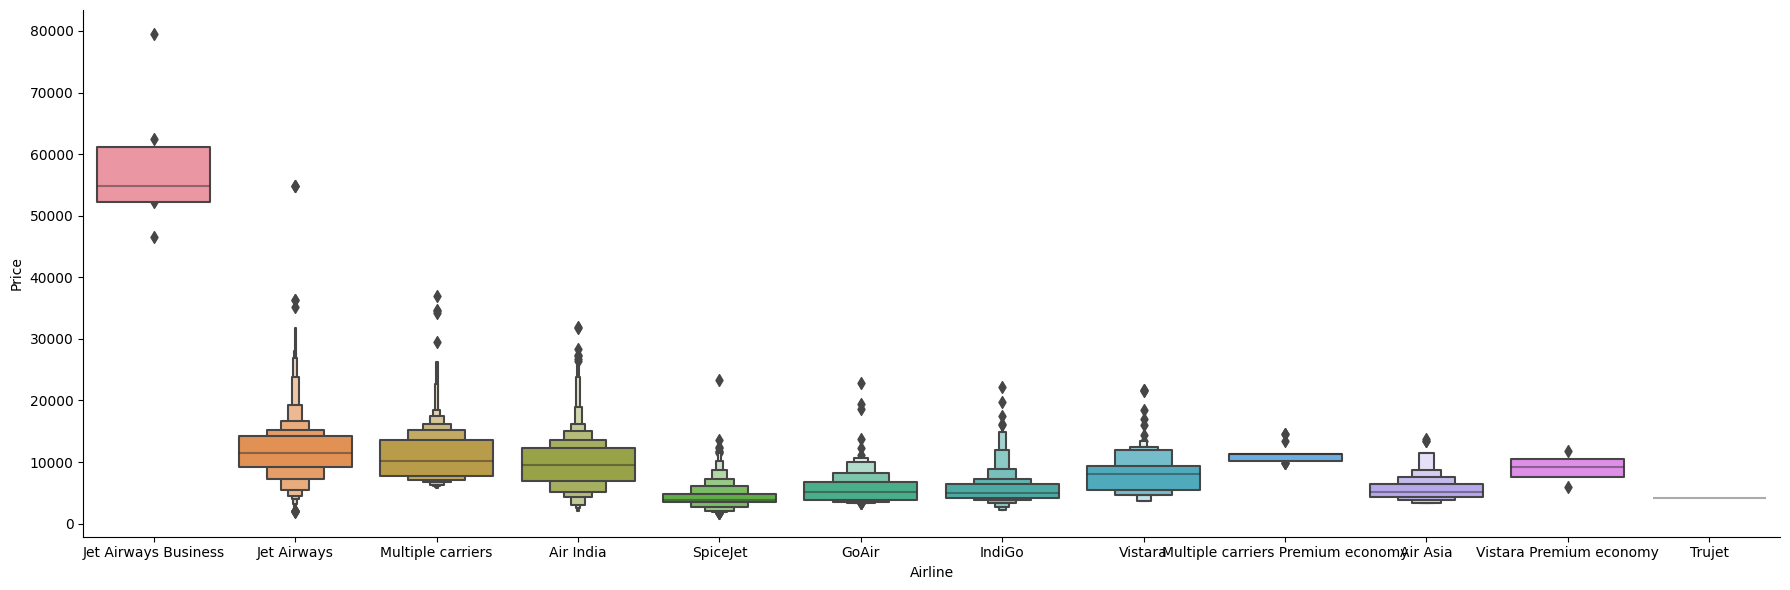

In [57]:
# we can observe that jet airways bussiness is he costliest airways
sns.catplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=6)

In [58]:
airline = train_data[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


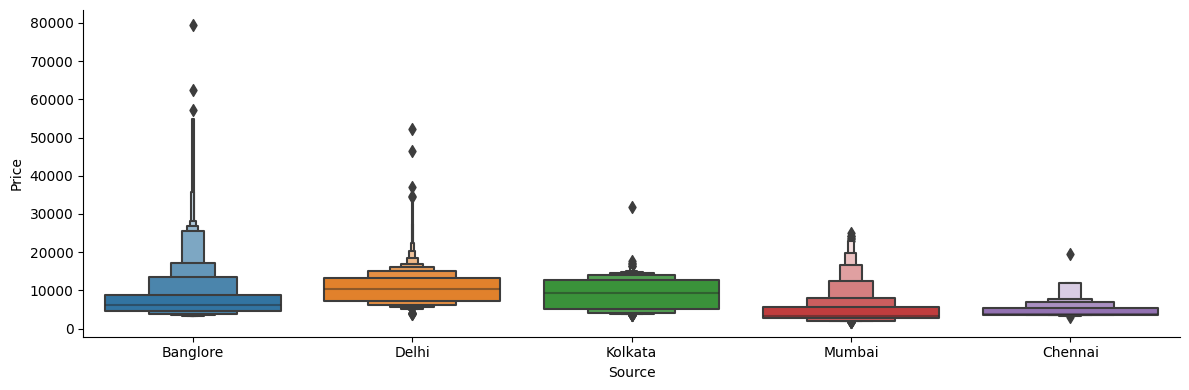

In [59]:
# If we are going from Banglore the prices are slightly higher as compared to other cities
sns.catplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=4)

In [60]:
source = train_data[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


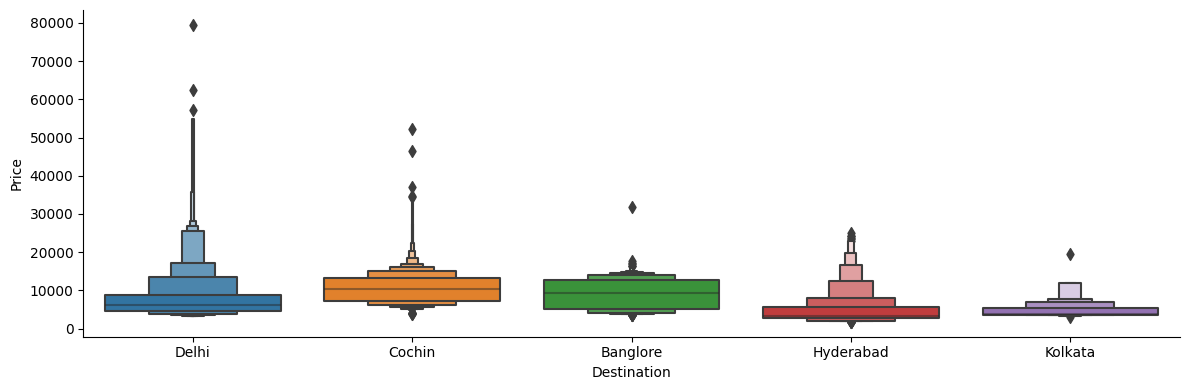

In [61]:
# If we are going to New Delhi the prices are slightly higher as compared to other cities
sns.catplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=4)

In [62]:
destination = train_data[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [63]:
train_data.drop(['Route','Additional_Info'],inplace=True,axis=1)

In [64]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [65]:
# acc to the data, price is directly prop to the no. of stops
train_data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


In [66]:
print(airline.shape)
print(source.shape)
print(destination.shape)
print(train_data.shape)

(10682, 11)
(10682, 4)
(10682, 4)
(10682, 13)


In [67]:
data_train = pd.concat([train_data,airline,source,destination],axis=1)
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. **heatmap** 
2. **feature_importance**

In [68]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [69]:
X = data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
y = data_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

C:\Users\parhi\AppData\Local\Temp\ipykernel_21488\1098957341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),cmap='viridis',annot=True)


<Axes: >

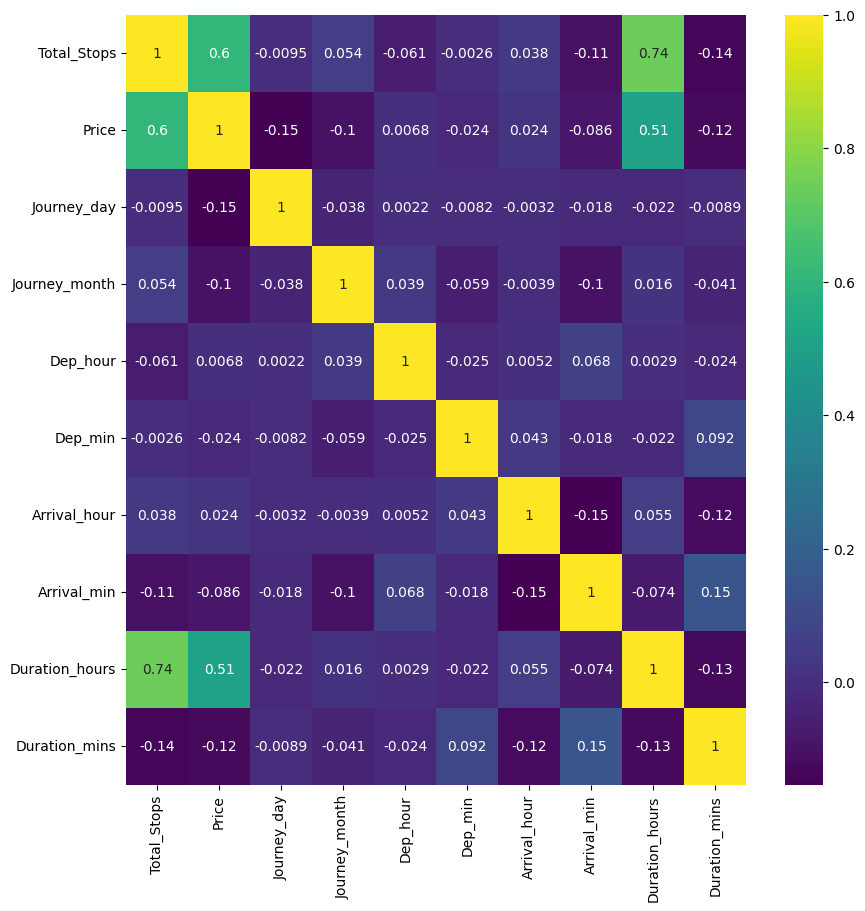

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),cmap='viridis',annot=True)

In [72]:
reg = ExtraTreesRegressor()
reg.fit(X,y)

print(reg.feature_importances_)

[2.32415126e-01 1.41954094e-01 5.84270910e-02 2.39613527e-02
 2.16036042e-02 2.71421591e-02 2.04541409e-02 1.40498360e-01
 1.83521420e-02 1.05741667e-02 2.06420284e-03 1.77036197e-02
 1.28649413e-01 6.74724283e-02 1.82942860e-02 8.31018155e-04
 5.44848415e-03 1.13194035e-04 4.70377841e-03 6.13089835e-05
 6.91961695e-04 6.77112599e-03 4.89658104e-03 8.63015216e-03
 1.17767277e-02 1.87530785e-02 6.98493303e-03 7.71468838e-04]


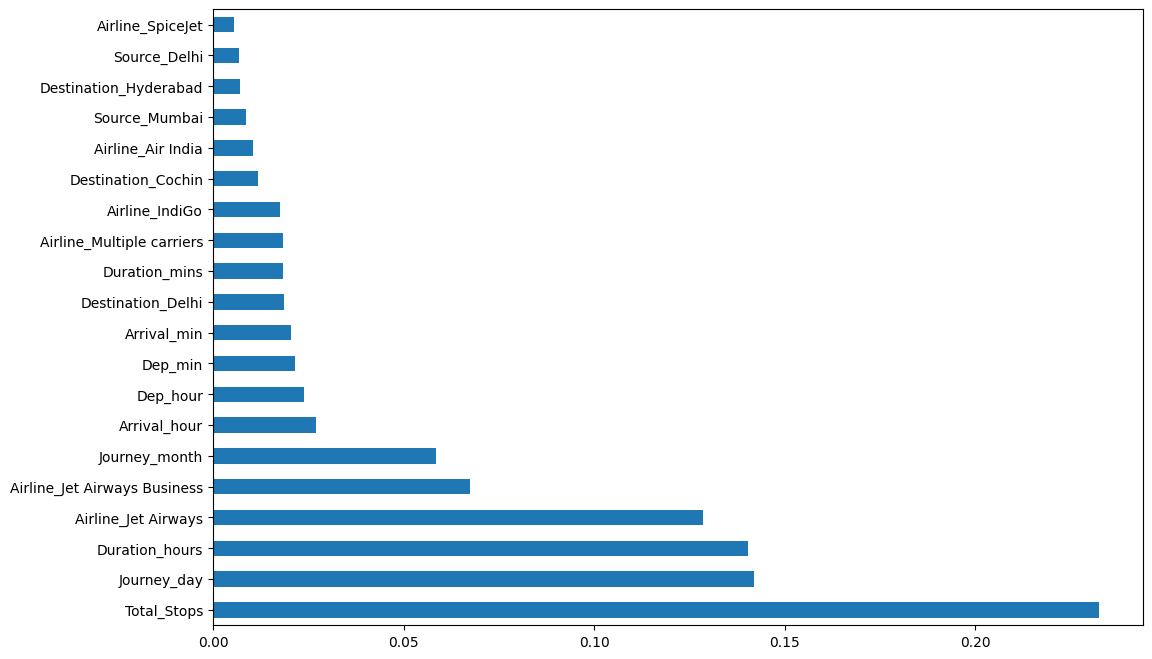

In [73]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using different algorithms

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Linear Regression:

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

#make predictions
y_pred = lr.predict(X_test)

# Evaluate the model on the testing data
score = lr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# print("Accuracy of model :", score)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared:", r2)

Mean squared error: 7839969.180595527
Root mean squared error: 2799.994496529507
R-squared: 0.6094366894926816


In [76]:
print("Size of X:", len(X))
print("Size of y:", len(y))

Size of X: 10682
Size of y: 10682


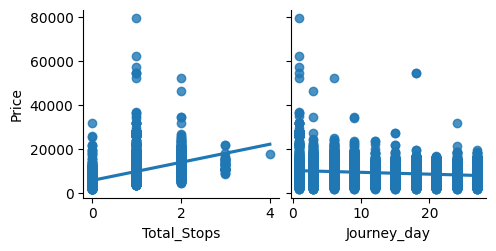

In [77]:
features = [ 'Total_Stops','Journey_day' ]
target ='Price'

# Create a pairplot with the data
sns.pairplot(train_data, x_vars=features, y_vars=target, kind='reg')

# Show the plot
plt.show()

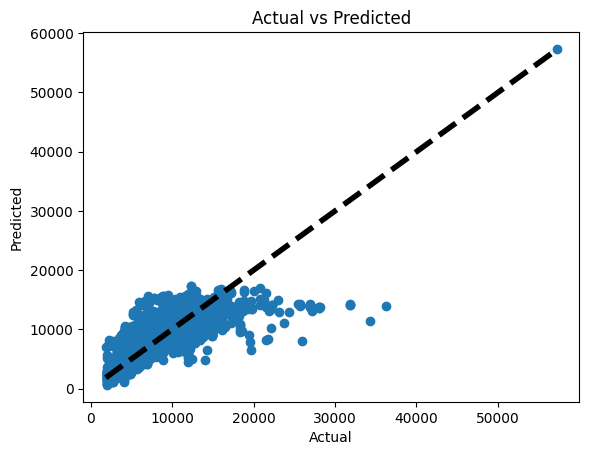

In [78]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [79]:
# # Plot the data points
# plt.scatter(X_test, y_test, color='black')

# # Plot the linear regression line
# plt.plot(X_test, y_pred, color='blue', linewidth=3)

# # Reshape the arrays to have the same shape
# y = y.reshape(-1, 1)

# # Add labels and title to the plot
# plt.xlabel('X values')
# plt.ylabel('y values')
# plt.title('Linear Regression')

# # Show the plot
# plt.show()

# Decision Tree:

In [80]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_score = dt.score(X_test, y_test)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred)

print("Accuracy of model :", dt_score)
print("Mean squared error:", dt_mse)
print("Root mean squared error:", dt_rmse)
print("R-squared:", dt_r2)

Accuracy of model : 0.6431503011341454
Mean squared error: 7163219.293637853
Root mean squared error: 2676.419117708931
R-squared: 0.6431503011341454


In [81]:
# from sklearn.tree import export_graphviz
# import graphviz

# dot_data = export_graphviz(dt, out_file=None, 
#                            feature_names=X.columns,  
#                            class_names=y.unique(),  
#                            filled=True, rounded=True,  
#                            special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("decision_tree")



# Random Forest:

In [92]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=1, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\parhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\parhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\parhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [93]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [94]:
prediction = rf_random.predict(X_test)

<Figure size 800x800 with 0 Axes>

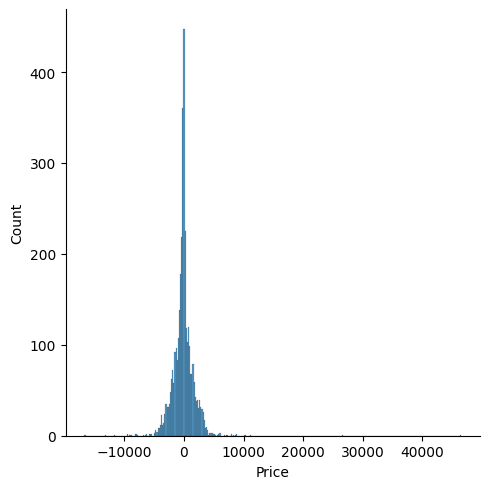

In [95]:
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)
plt.show()

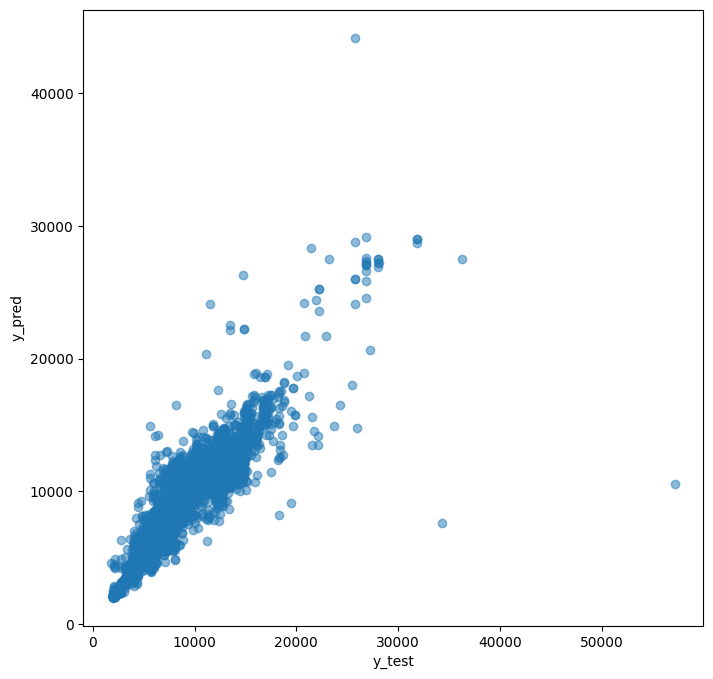

In [86]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

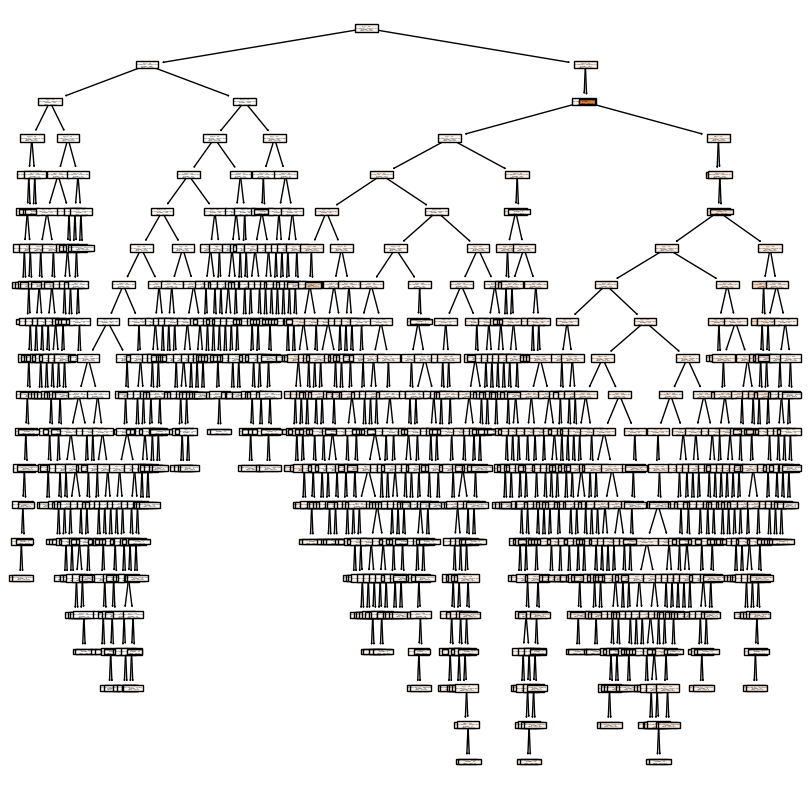

In [87]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract the first tree from the random forest
tree = rf_random.best_estimator_.estimators_[0]

# Plot the first tree
plt.figure(figsize=(10,10))
plot_tree(tree, filled=True)
plt.show()


In [96]:
print('r2 score: ', metrics.r2_score(y_test,prediction))

r2 score:  0.8111178095064131


In [97]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(dt_mse)
print("Mean squared error:", rf_mse)
print("Root mean squared error:", rf_rmse)

Mean squared error: 7163219.293637853
Root mean squared error: 2676.419117708931


# Save the model to reuse it again

In [98]:
# file = open('flight_rf.pkl', 'wb')
# pickle.dump(rf_random, file)